<a href="https://colab.research.google.com/github/mbolaris/shark-data-analysis/blob/main/shark_gpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Provide an overview of the project, objectives.
## Data Overview
Briefly describe the dataset, the tagging technology used (PAT and SLRT tags), and what kind of data was collected (depth, temperature, acceleration, etc.).


## Tag and Firmware Details

- Firmware version: 3.0
- Firmware: 70


## Lifetime Notebook Contents

- Tag ID: A14243
- Pressure: 50 (possible depth measurement unit, possibly meters)
- Number of sensors: 5


## Deployment Notebook Contents

- Start of data logging: 15/10/20
- Stopped logging sensors: 1 P Txyz z
- Resolution: 12
- Fast rate: 0
- Repeat Rate and Repeat Count: 0


## Mission Parameters

- Dive Termination Percentage: 1.5%
- Dive Termination Depth: >7.5m
- G range selected: 2g
- Wet dry logging: Inhibited
- Logging of Dive data: Active


## Daylog Contents and Data for Last Deployment

- Tags Diary starting from Shipped date: 22/08/20
- Last Clock Set: 12/10/20
- Deployment date: 12/10/20 with Host V7.1.0
- Download date: 12/10/20 with Host V7.1.1
- Total Days Alive: 51
- Reference number: 19378

### Daylog Data for Last Deployment

- Date Range: 15/10/17 to 22/10/17
- Daily data points for max/min temperature, max/min depth, and battery voltage.


## Data Block 1

- Start Time: 15/10/2017 14:45:00
- Stop Time: 30/11/2017 02:17:00 p.m.
- Resolution: 12
- Logging Rate: 1
- Total data points available: 700620
- Data points starting from 15/10/17


## Depth and Tempature Analysis

### Data Loading

In [1]:
%pip install astral
# Replace with the path to your CSV file
#file_path = 'C:\\shared\\bolaris\\shark-data\\A14243_23-10-2017.csv'

#Uncomment if using Google Drive
from google.colab import auth
from google.colab import drive
auth.authenticate_user()
drive.mount('/content/drive')
file_path ='drive/MyDrive/shark-data/A14243_23-10-2017.csv'

Mounted at /content/drive


### Plot the Data

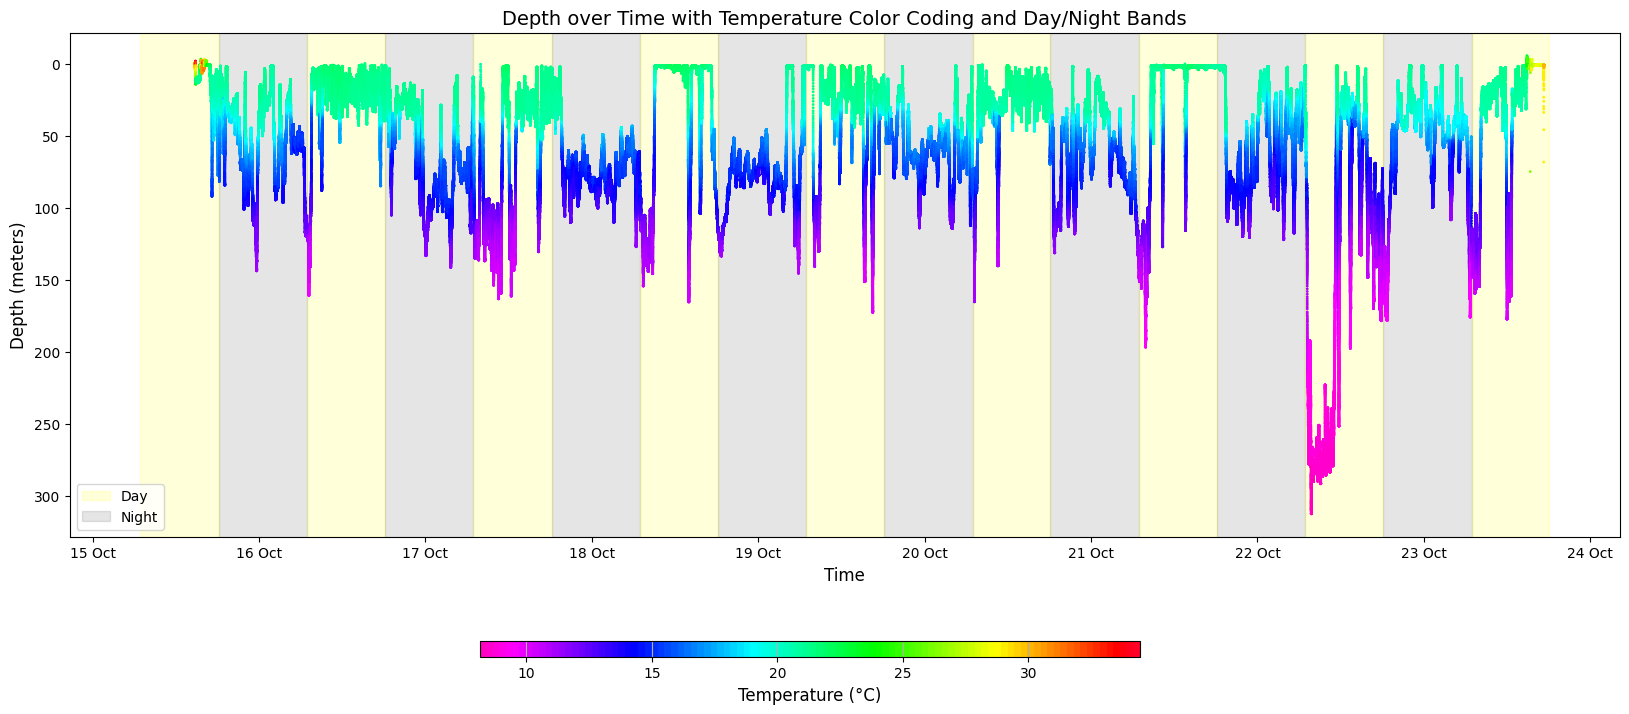

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap
from astral import LocationInfo
from astral.sun import sun
from datetime import datetime, timedelta
from pytz import timezone

# Load the data
data = pd.read_csv(file_path, skiprows=59)

# Assuming your 'Time Stamp' column is a string in the format '15/10/17 14:45'
data['Time Stamp'] = pd.to_datetime(data['Time Stamp'], format='%d/%m/%y %H:%M', errors='coerce')

# Clean the data filter out invalid pressure, temperature values
data = data[(~data['Pressure'].isna()) & (data['Pressure'] != np.inf) & (data['Pressure'] != -np.inf) &
            (~data['Temp'].isna()) & (data['Temp'] != np.inf) & (data['Temp'] != -np.inf)]

# Use a predefined colormap
cmap = plt.get_cmap('gist_rainbow', 100).reversed()

# This scales the temperature values on the colormap.
norm = plt.Normalize(vmin=data['Temp'].min(), vmax=data['Temp'].max())

# Initialize plot
plt.figure(figsize=(20, 8))

# Use astral library to plot day-night cycle
city = LocationInfo('Ensenada', 'Mexico', 'America/Tijuana', 31.8654, -116.5964)
local_tz = timezone('America/Tijuana')

for date in pd.to_datetime(data['Time Stamp']).dt.date.unique():
    s = sun(city.observer, date=date, tzinfo=local_tz)
    sunrise = s['sunrise'].replace(tzinfo=None)
    sunset = s['sunset'].replace(tzinfo=None)

    # Plot day-night bands
    plt.axvspan(sunrise, sunset, color='#FFFF00', alpha=0.15, label='Day')
    if date != data['Time Stamp'].dt.date.max():
        next_day_sunrise = sun(city.observer, date=date + timedelta(days=1), tzinfo=local_tz)['sunrise'].replace(tzinfo=None)
        plt.axvspan(sunset, next_day_sunrise, color='black', alpha=0.1, label='Night')

# Plot depth data against time, colored by temperature
sc = plt.scatter(data['Time Stamp'], data['Pressure'], c=data['Temp'], cmap=cmap, norm=norm, s=1, alpha=1.0)
plt.gca().invert_yaxis()

# Format the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))

# Only add the legend for day/night once
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='lower left')

# Set plot titles and labels
plt.title('Depth over Time with Temperature Color Coding and Day/Night Bands', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Depth (meters)', fontsize=12)

# Increase the bottom margin to ensure the colorbar does not overlap with x-axis labels
plt.subplots_adjust(bottom=0.25)

# Adjust the position of the colorbar
colorbar_axes = plt.gcf().add_axes([0.33, 0.1, 0.33, 0.02])

# Create the colorbar with the specified axes and orientation
cbar = plt.colorbar(sc, cax=colorbar_axes, orientation='horizontal')

# Set the label for the colorbar
cbar.set_label('Temperature (°C)', fontsize=12)

# Set the grid for better readability
plt.grid(True)

# Show the plot
plt.show()

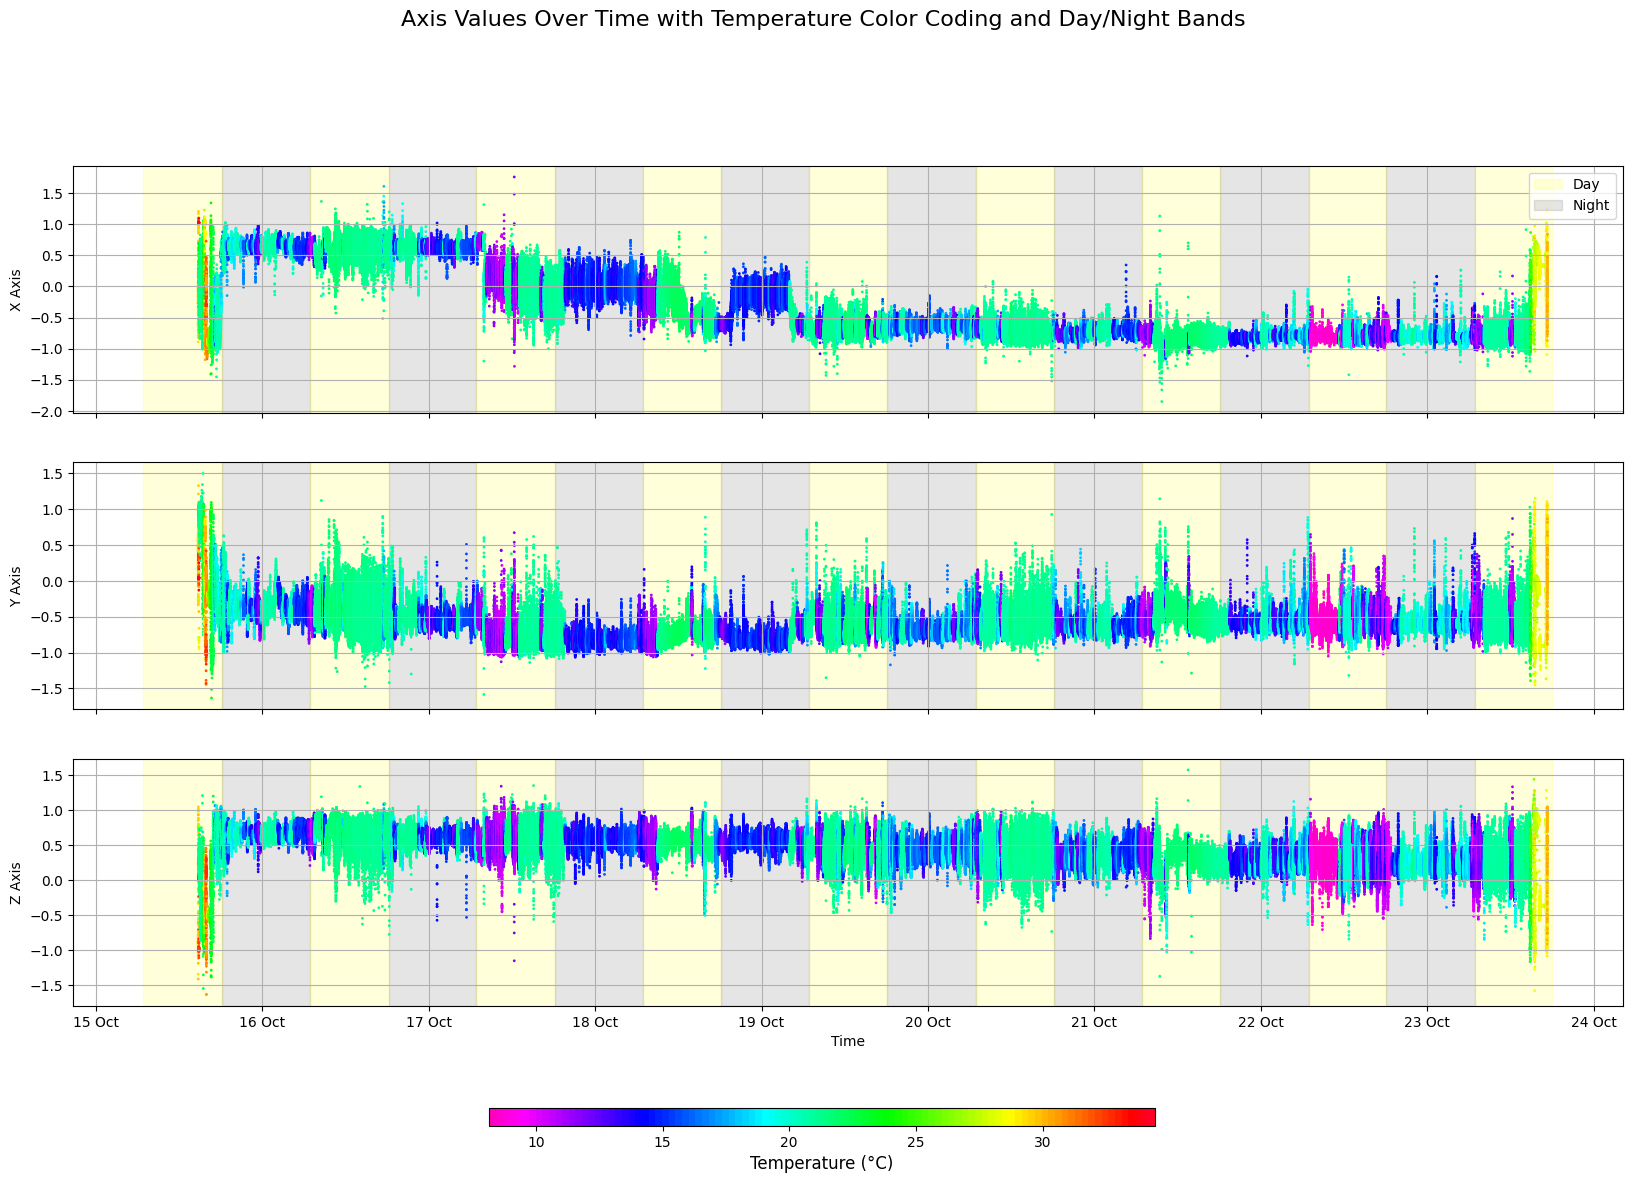

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from astral import LocationInfo
from astral.sun import sun
from datetime import datetime, timedelta
from pytz import timezone
import numpy as np

# Assuming 'data' has been loaded as per your previous code

# Use the 'gist_rainbow' colormap, same as before
cmap = plt.get_cmap('gist_rainbow', 100).reversed()
norm = plt.Normalize(vmin=data['Temp'].min(), vmax=data['Temp'].max())

# Use astral library to determine day-night cycle
city = LocationInfo('Ensenada', 'Mexico', 'America/Tijuana', 31.8654, -116.5964)
local_tz = timezone('America/Tijuana')

# Create a subplot layout
fig, axs = plt.subplots(3, 1, figsize=(20, 12), sharex=True)

# Store the day/night patches for the legend
day_patch = None
night_patch = None

for i, axis in enumerate(['X Axis', 'Y Axis', 'Z Axis']):
    # Plot day-night bands for each subplot
    for date in pd.to_datetime(data['Time Stamp']).dt.date.unique():
        s = sun(city.observer, date=date, tzinfo=local_tz)
        sunrise = s['sunrise'].replace(tzinfo=None)
        sunset = s['sunset'].replace(tzinfo=None)

        day_patch = axs[i].axvspan(sunrise, sunset, color='#FFFF00', alpha=0.15)
        if date != data['Time Stamp'].dt.date.max():
            next_day_sunrise = sun(city.observer, date=date + timedelta(days=1), tzinfo=local_tz)['sunrise'].replace(tzinfo=None)
            night_patch = axs[i].axvspan(sunset, next_day_sunrise, color='black', alpha=0.1)

    # Scatter plot for color-coded temperature data
    sc = axs[i].scatter(data['Time Stamp'], data[axis], c=data['Temp'], cmap=cmap, norm=norm, s=1, alpha=1.0)

    axs[i].set_ylabel(f'{axis}')
    axs[i].grid(True)

    # Format the x-axis
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
    axs[i].xaxis.set_major_locator(mdates.DayLocator(interval=1))

# Add a legend for day and night bands
axs[0].legend([day_patch, night_patch], ['Day', 'Night'], loc='upper right')

# Set common X-Axis properties
axs[-1].set_xlabel('Time')

# Set the title for the entire figure
fig.suptitle('Axis Values Over Time with Temperature Color Coding and Day/Night Bands', fontsize=16)

# Adjust the position of the colorbar
# These values are fractions of the figure size. (left, bottom, width, height)
colorbar_axes = fig.add_axes([0.333, 0.05, 0.333, 0.015])

# Create the colorbar with the specified axes and orientation
cbar = plt.colorbar(sc, cax=colorbar_axes, orientation='horizontal')
cbar.set_label('Temperature (°C)', fontsize=12)

# Set the grid for better readability
for ax in axs:
    ax.grid(True)

# Adjust layout
fig.subplots_adjust(bottom=0.15, top=0.85)

# Show the plot
plt.show()

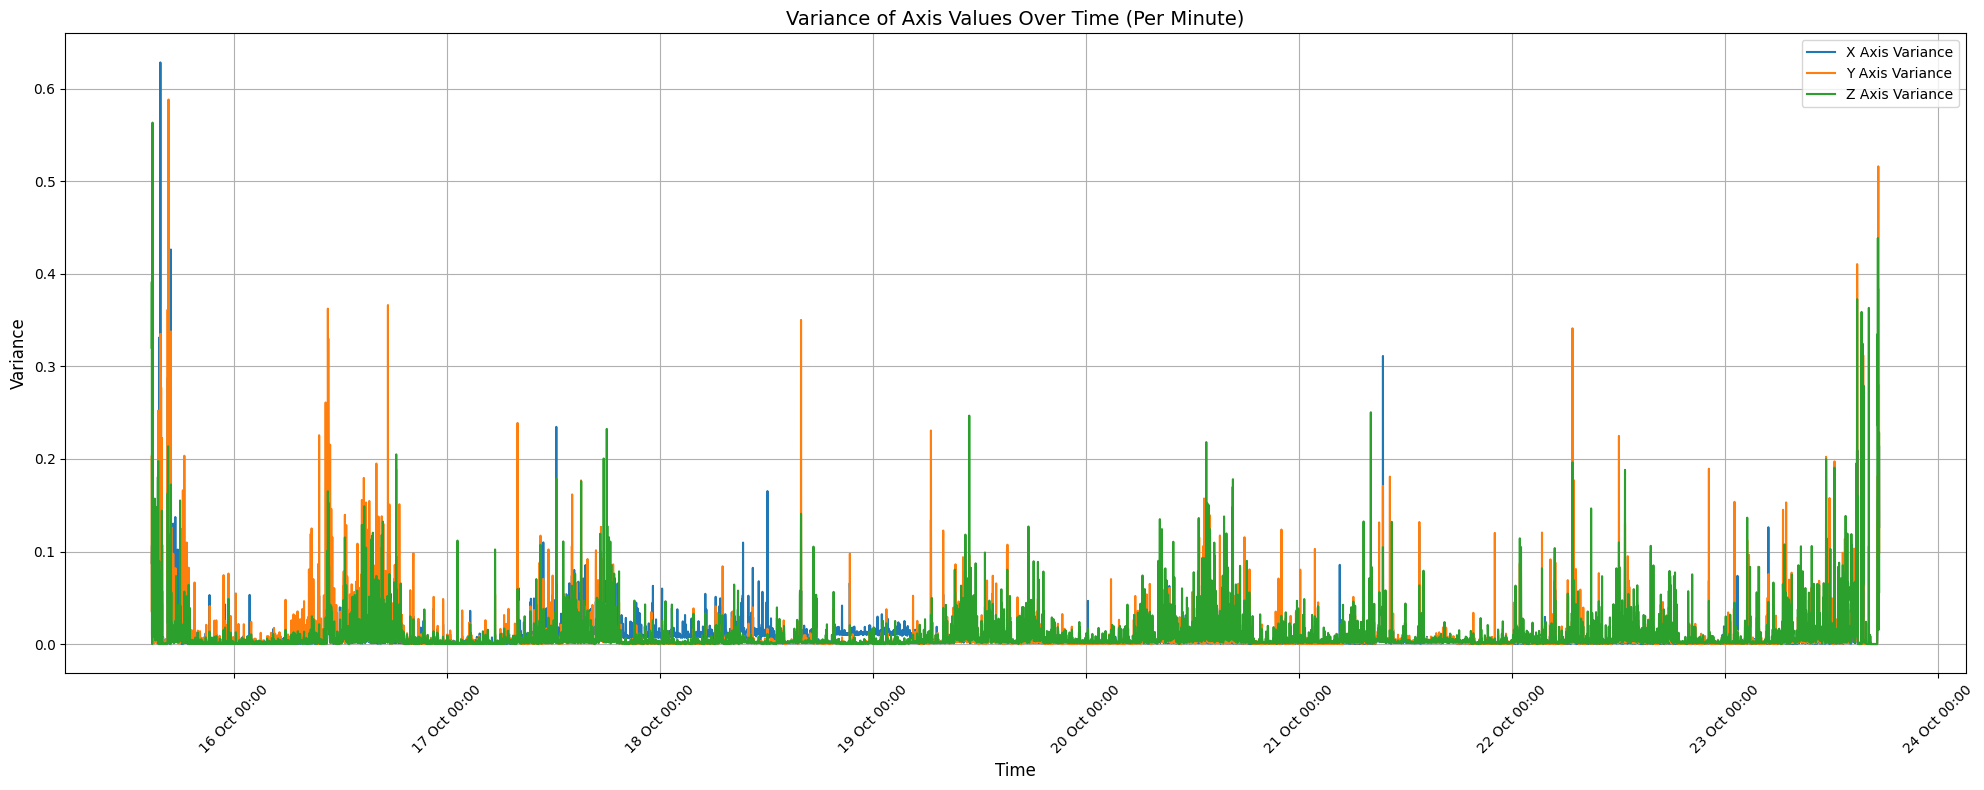

In [4]:
# Resample the data to 1-minute intervals and calculate variance
data.set_index('Time Stamp', inplace=True)

# Calculate the variance for each minute for each axis
variance_data = data[['X Axis', 'Y Axis', 'Z Axis']].resample('1T').var()

# Reset the index so 'Time Stamp' can be used as a column for plotting
variance_data.reset_index(inplace=True)

# Initialize plot
plt.figure(figsize=(20, 8))

# Plot the variance for each axis over time
for axis in ['X Axis', 'Y Axis', 'Z Axis']:
    plt.plot(variance_data['Time Stamp'], variance_data[axis], label=f'{axis} Variance')

# Format the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Add legend
plt.legend()

# Set plot titles and labels
plt.title('Variance of Axis Values Over Time (Per Minute)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Variance', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set the grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Use tight layout to fit all elements
plt.show()


<ipython-input-5-fcf3dcbb67de>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time Stamp'] = pd.to_datetime(data['Time Stamp'], format='%d/%m/%y %H:%M', errors='coerce')


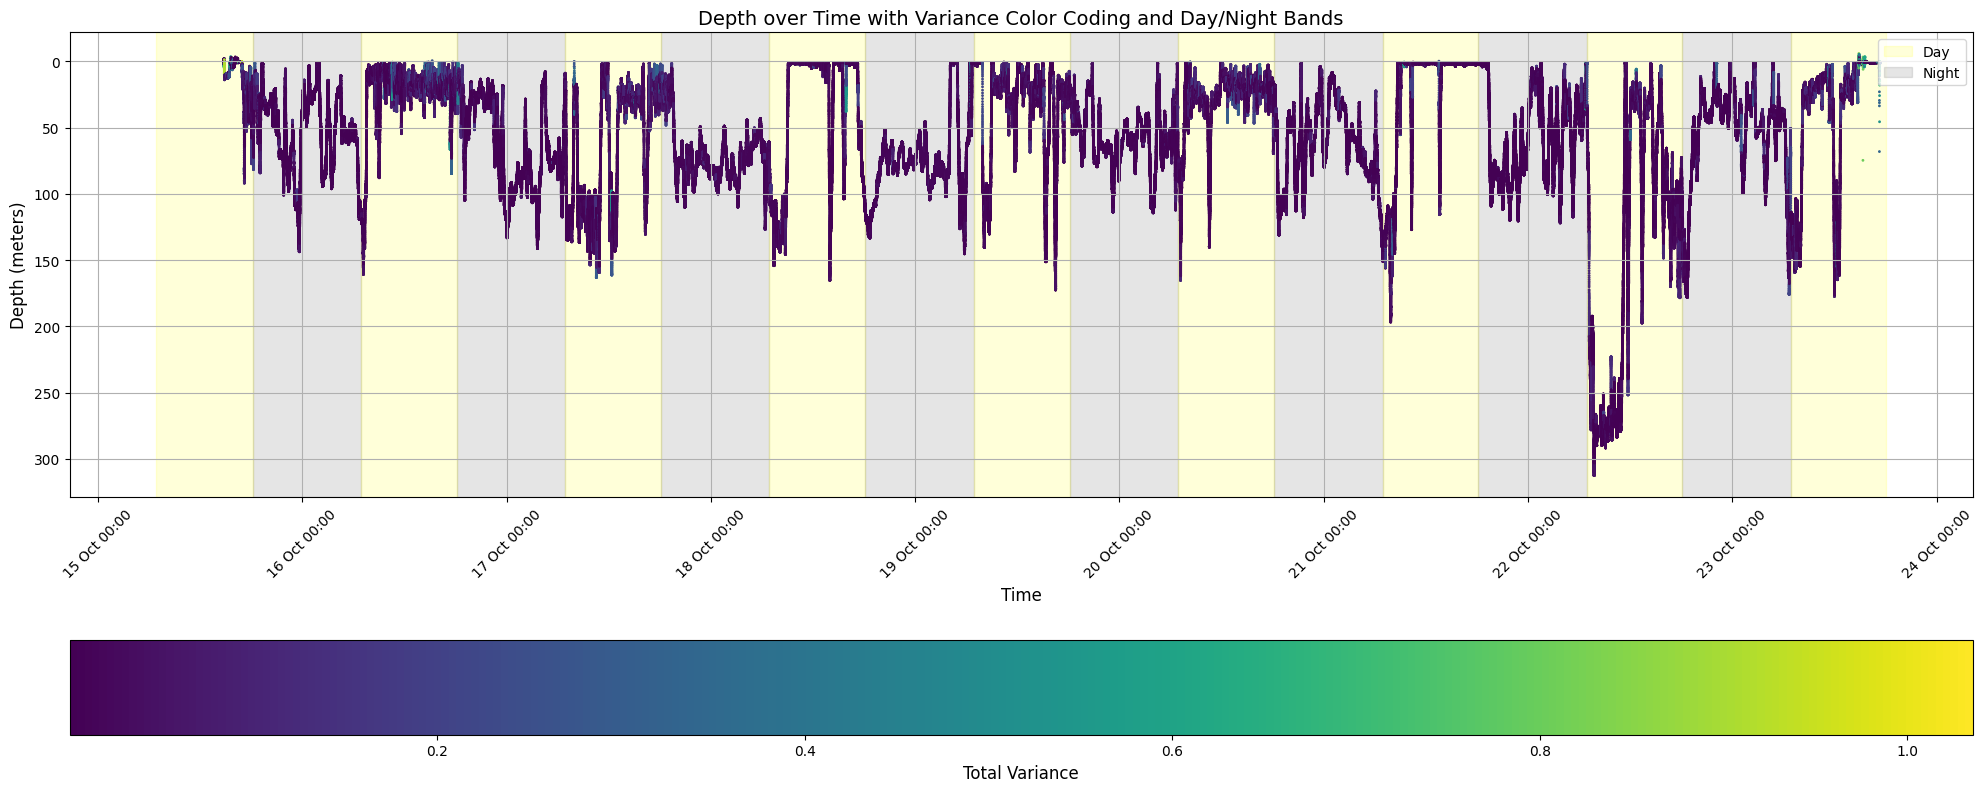

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from astral import LocationInfo
from astral.sun import sun
from datetime import datetime, timedelta
from pytz import timezone

# Load the data
data = pd.read_csv(file_path, skiprows=59)

# Drop rows with NaN values in 'Time Stamp' column
data = data.dropna(subset=['Time Stamp'])

# Convert 'Time Stamp' column to datetime
data['Time Stamp'] = pd.to_datetime(data['Time Stamp'], format='%d/%m/%y %H:%M', errors='coerce')

# Set 'Time Stamp' as the index
data.set_index('Time Stamp', inplace=True)

# Resample data for each minute and calculate variance
variance_data = data[['X Axis', 'Y Axis', 'Z Axis']].resample('1T').var()

# Calculate the sum of variances of the three axes
variance_data['Total Variance'] = variance_data.sum(axis=1)

# Reset index to use 'Time Stamp' in plots
variance_data.reset_index(inplace=True)

# Merge the total variance back into the original data
data.reset_index(inplace=True)  # Reset index to retain 'Time Stamp' as a column
data = data.merge(variance_data[['Time Stamp', 'Total Variance']], on='Time Stamp', how='left')

# Drop rows with NaN values in 'Time Stamp' column after merge
data = data.dropna(subset=['Time Stamp'])

# Normalize the 'Total Variance' for color mapping
norm = plt.Normalize(vmin=data['Total Variance'].min(), vmax=data['Total Variance'].max())
cmap = plt.get_cmap('viridis')

# Initialize plot
plt.figure(figsize=(20, 8))

# Use astral library to plot day-night cycle
city = LocationInfo('Ensenada', 'Mexico', 'America/Tijuana', 31.8654, -116.5964)
local_tz = timezone('America/Tijuana')

# Plot day-night bands
for date in data['Time Stamp'].dt.date.unique():
    s = sun(city.observer, date=date, tzinfo=local_tz)
    sunrise = s['sunrise'].replace(tzinfo=None)
    sunset = s['sunset'].replace(tzinfo=None)

    plt.axvspan(sunrise, sunset, color='#FFFF00', alpha=0.15, label='Day' if date == data['Time Stamp'].dt.date.min() else "")
    max_date = data['Time Stamp'].dt.date.max()  # Ensure no NaT values
    if date != max_date:
        next_day_sunrise = sun(city.observer, date=date + timedelta(days=1), tzinfo=local_tz)['sunrise'].replace(tzinfo=None)
        plt.axvspan(sunset, next_day_sunrise, color='black', alpha=0.1, label='Night' if date == data['Time Stamp'].dt.date.min() else "")

# Plot depth data against time, colored by the total variance
sc = plt.scatter(data['Time Stamp'], data['Pressure'], c=data['Total Variance'], cmap=cmap, norm=norm, s=1, alpha=1.0)
plt.gca().invert_yaxis()

# Format the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Add colorbar
cbar = plt.colorbar(sc, orientation='horizontal', pad=0.2)
cbar.set_label('Total Variance', fontsize=12)

# Set plot titles and labels
plt.title('Depth over Time with Variance Color Coding and Day/Night Bands', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Depth (meters)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add grid
plt.grid(True)

# Add legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')

# Show the plot
plt.tight_layout()  # Use tight layout to fit all elements
plt.show()

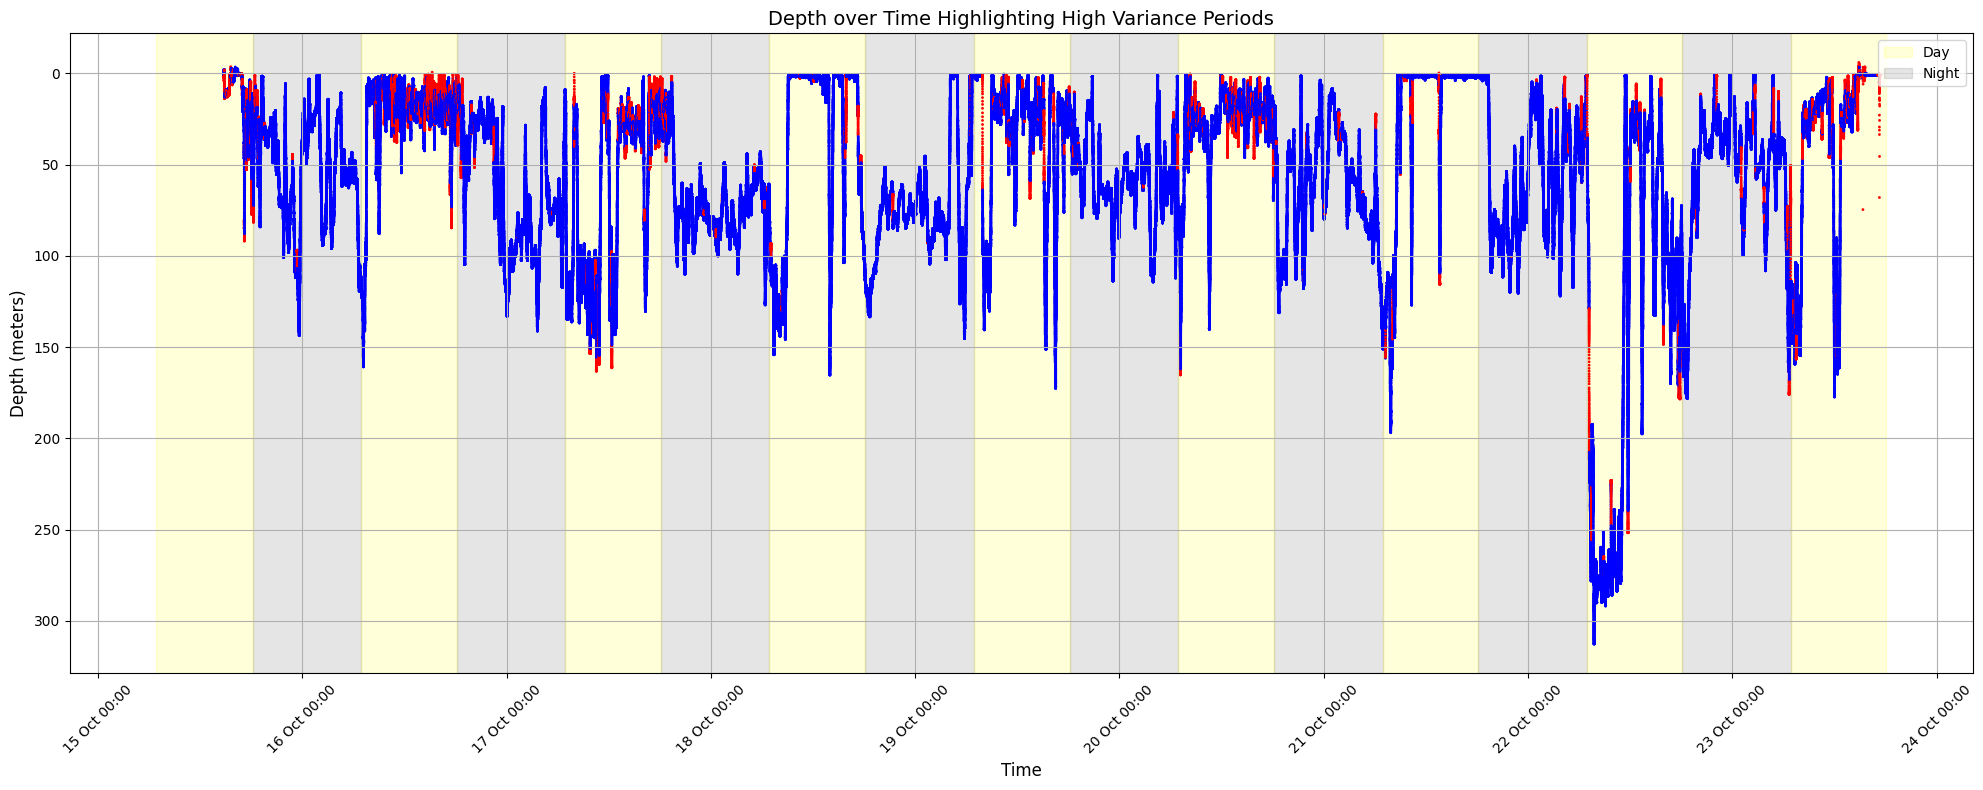

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from astral import LocationInfo
from astral.sun import sun
from datetime import datetime, timedelta
from pytz import timezone

# Load the data
data = pd.read_csv(file_path, skiprows=59)

# Drop rows with NaN values in 'Time Stamp' column
data = data.dropna(subset=['Time Stamp'])

# Convert 'Time Stamp' column to datetime
data['Time Stamp'] = pd.to_datetime(data['Time Stamp'], format='%d/%m/%y %H:%M', errors='coerce')

# Set 'Time Stamp' as the index
data.set_index('Time Stamp', inplace=True)

# Resample data for each minute and calculate variance
variance_data = data[['X Axis', 'Y Axis', 'Z Axis']].resample('1T').var()

# Calculate the sum of variances of the three axes
variance_data['Total Variance'] = variance_data.sum(axis=1)

# Reset index to use 'Time Stamp' in plots
variance_data.reset_index(inplace=True)

# Merge the total variance back into the original data
data.reset_index(inplace=True)  # Reset index to retain 'Time Stamp' as a column
data = data.merge(variance_data[['Time Stamp', 'Total Variance']], on='Time Stamp', how='left')

# Drop rows with NaN values in 'Time Stamp' column after merge
data = data.dropna(subset=['Time Stamp'])

# Define a threshold for high variance
high_variance_threshold = data['Total Variance'].quantile(0.95)

# Initialize plot
plt.figure(figsize=(20, 8))

# Use astral library to plot day-night cycle
city = LocationInfo('Ensenada', 'Mexico', 'America/Tijuana', 31.8654, -116.5964)
local_tz = timezone('America/Tijuana')

# Plot day-night bands
for date in data['Time Stamp'].dt.date.unique():
    s = sun(city.observer, date=date, tzinfo=local_tz)
    sunrise = s['sunrise'].replace(tzinfo=None)
    sunset = s['sunset'].replace(tzinfo=None)

    plt.axvspan(sunrise, sunset, color='#FFFF00', alpha=0.15, label='Day' if date == data['Time Stamp'].dt.date.min() else "")
    max_date = data['Time Stamp'].dt.date.max()  # Ensure no NaT values
    if date != max_date:
        next_day_sunrise = sun(city.observer, date=date + timedelta(days=1), tzinfo=local_tz)['sunrise'].replace(tzinfo=None)
        plt.axvspan(sunset, next_day_sunrise, color='black', alpha=0.1, label='Night' if date == data['Time Stamp'].dt.date.min() else "")

# Plot depth data against time, color-coded by high variance periods
colors = ['red' if var > high_variance_threshold else 'blue' for var in data['Total Variance']]
sc = plt.scatter(data['Time Stamp'], data['Pressure'], c=colors, s=1, alpha=1.0)
plt.gca().invert_yaxis()

# Format the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Set plot titles and labels
plt.title('Depth over Time Highlighting High Variance Periods', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Depth (meters)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add grid
plt.grid(True)

# Add legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')

# Show the plot
plt.tight_layout()  # Use tight layout to fit all elements
plt.show()


<ipython-input-7-c1d88f7bb5af>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ODBA'] = data[['X Axis', 'Y Axis', 'Z Axis']].abs().sum(axis=1)


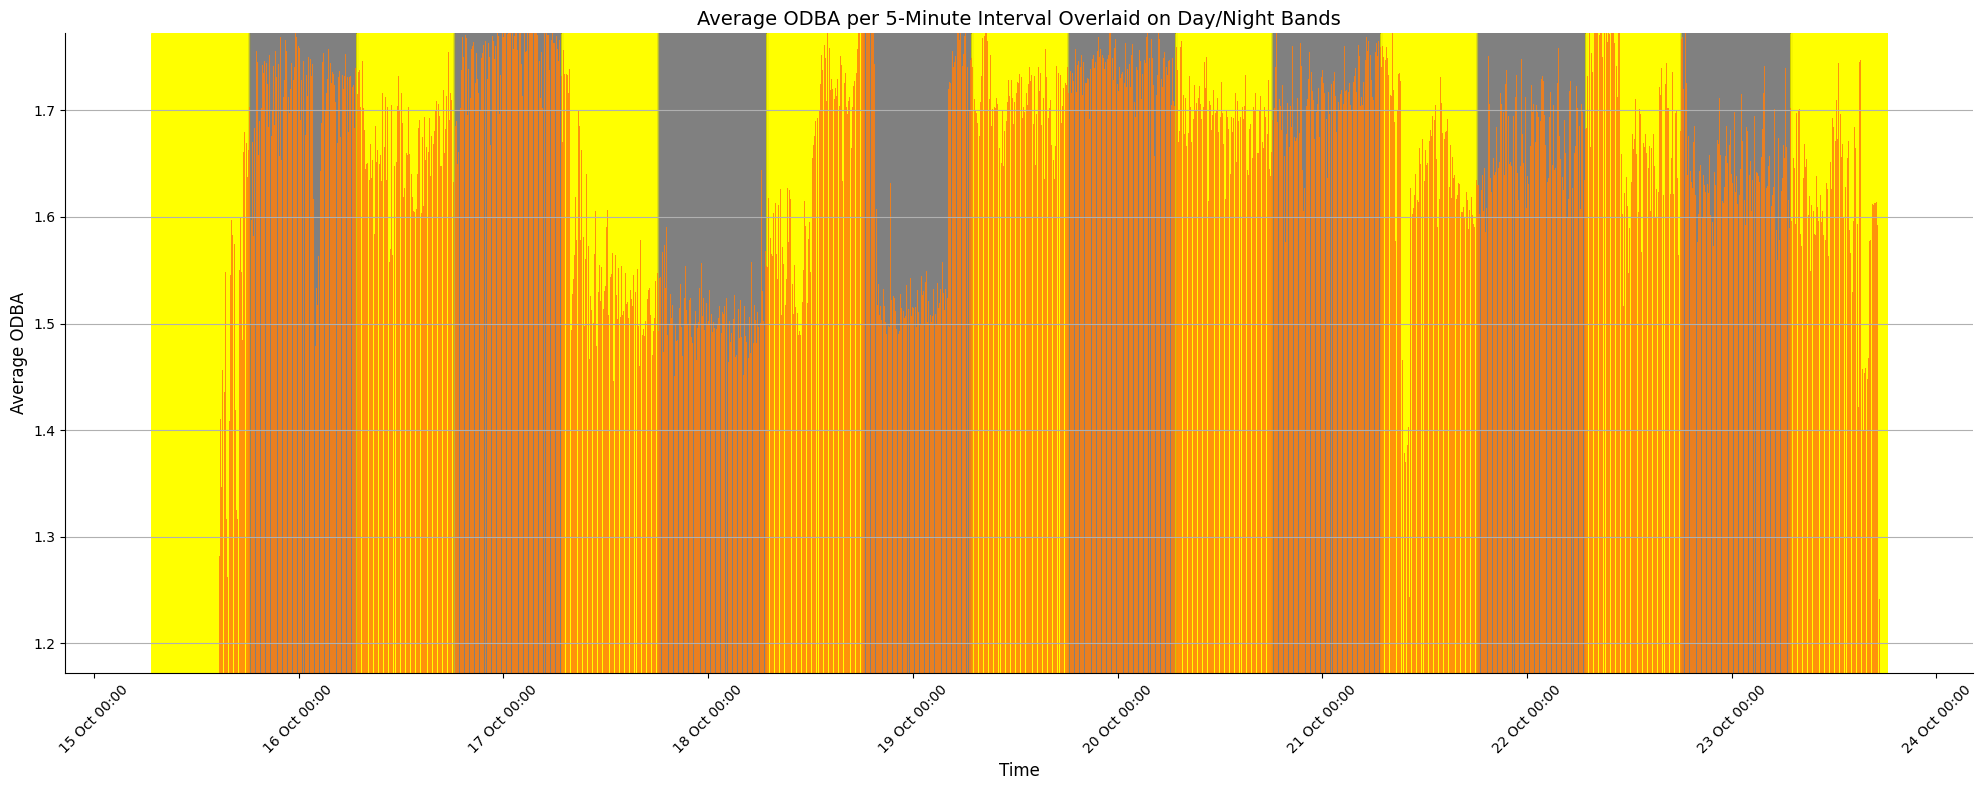

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from astral import LocationInfo
from astral.sun import sun
from datetime import datetime, timedelta
from pytz import timezone

# Load the data
data = pd.read_csv(file_path, skiprows=59)

# Convert 'Time Stamp' column to datetime
data['Time Stamp'] = pd.to_datetime(data['Time Stamp'], format='%d/%m/%y %H:%M', errors='coerce')

# Drop rows with NaN values in 'Time Stamp' column
data = data.dropna(subset=['Time Stamp'])

# Set 'Time Stamp' as the index
data.set_index('Time Stamp', inplace=True)

# Calculate ODBA as the sum of the absolute values of the dynamic accelerations
data['ODBA'] = data[['X Axis', 'Y Axis', 'Z Axis']].abs().sum(axis=1)

# Resample data for each 5-minute interval and calculate the average ODBA
odba_5min_avg = data['ODBA'].resample('5T').mean()

# Find the minimum ODBA value
min_odba = odba_5min_avg.min()

# Initialize plot
plt.figure(figsize=(20, 8))

# Use astral library to plot day-night cycle
city = LocationInfo('Ensenada', 'Mexico', 'America/Tijuana', 31.8654, -116.5964)
local_tz = timezone('America/Tijuana')

# Plot day-night bands
for date in odba_5min_avg.index.date:
    s = sun(city.observer, date=date, tzinfo=local_tz)
    sunrise = s['sunrise'].replace(tzinfo=None)
    sunset = s['sunset'].replace(tzinfo=None)

    plt.axvspan(sunrise, sunset, color='#FFFF00', alpha=0.1)  # Reduced alpha for day bands
    if date != odba_5min_avg.index.date[-1]:
        next_day_sunrise = sun(city.observer, date=date + timedelta(days=1), tzinfo=local_tz)['sunrise'].replace(tzinfo=None)
        plt.axvspan(sunset, next_day_sunrise, color='grey', alpha=0.1)  # Reduced alpha for night bands

# Plot the average ODBA values as a bar chart
bar_width = (odba_5min_avg.index[1] - odba_5min_avg.index[0]) * 0.8  # Adjust bar width to 80% of interval width

# Plot the average ODBA values as a bar chart with a color that stands out against the day/night bands
plt.bar(odba_5min_avg.index, odba_5min_avg, width=bar_width, align='center', alpha=0.85, color='tab:orange', edgecolor='none')

# Set the y-axis to have a fixed range that focuses on the majority of your data
plt.ylim([min_odba, odba_5min_avg.quantile(0.95)])  # Show up to the 95th percentile



# Format the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())


# Set plot titles and labels
plt.title('Average ODBA per 5-Minute Interval Overlaid on Day/Night Bands', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Average ODBA', fontsize=12)
plt.xticks(rotation=45)

# Add horizontal grid for better readability
plt.grid(True, axis='y')

# Remove top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


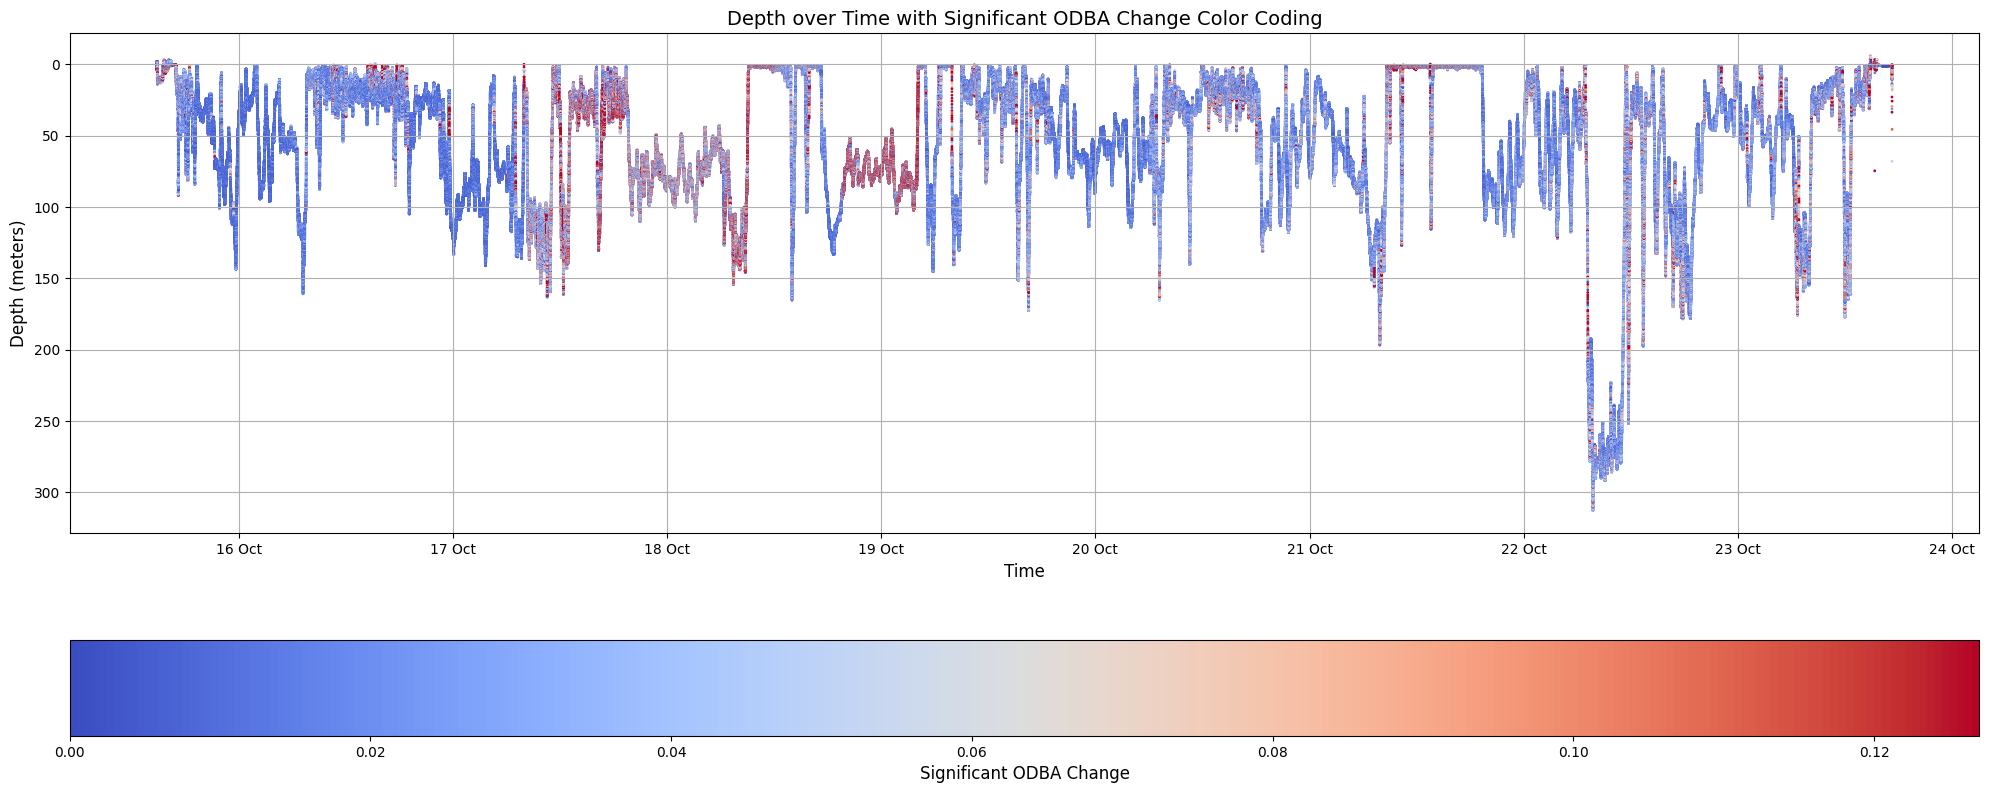

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap

# Load the data
data = pd.read_csv(file_path, skiprows=59)

# Assuming your 'Time Stamp' column is a string in the format '15/10/17 14:45'
data['Time Stamp'] = pd.to_datetime(data['Time Stamp'], format='%d/%m/%y %H:%M', errors='coerce')
data.dropna(subset=['Time Stamp'], inplace=True)
data.set_index('Time Stamp', inplace=True)

# Assuming 'X Axis', 'Y Axis', 'Z Axis' are the columns with acceleration data
# Calculate ODBA as the sum of the absolute dynamic acceleration on all three axes
data['ODBA'] = data[['X Axis', 'Y Axis', 'Z Axis']].abs().sum(axis=1)

# Calculate the rate of change of ODBA and define significant changes
data['ODBA_Change'] = data['ODBA'].diff().abs()
threshold = data['ODBA_Change'].quantile(0.95)  # 95th percentile as threshold

# Use a colormap to represent significant changes
cmap = plt.get_cmap('coolwarm')
norm = plt.Normalize(vmin=0, vmax=threshold)

# Plotting the depth data against time, color-coded by significant changes in ODBA
plt.figure(figsize=(20, 8))
sc = plt.scatter(data.index, data['Pressure'], c=data['ODBA_Change'], cmap=cmap, norm=norm, s=1, alpha=1.0)
plt.gca().invert_yaxis()

# Format the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))

# Create the colorbar
cbar = plt.colorbar(sc, orientation='horizontal')
cbar.set_label('Significant ODBA Change', fontsize=12)

# Set plot titles and labels
plt.title('Depth over Time with Significant ODBA Change Color Coding', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Depth (meters)', fontsize=12)

# Add horizontal grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
